In [1]:
import os
import numpy as np
from PIL import Image
import random
from tensorflow import keras
from matplotlib import pyplot as plt

In [5]:
import os
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

class DataReader():
    def __init__(self):
        self.label = ["horse", "human"]

        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []

        self.read_images()

    def read_images(self):
        data = []
        root = os.path.abspath(os.getcwd())  # 현재 작업 디렉터리 경로
        print("Reading Data...")
        classes = ["horse", "human"]
        
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            class_path = os.path.join(root, cls)  # 경로 결합
            for el in os.listdir(class_path):
                if el == ".ipynb_checkpoints":  
                    continue  # .ipynb_checkpoints 폴더 건너뛰기
                
                file_path = os.path.join(class_path, el)  # 이미지 파일 전체 경로
                try:
                    with Image.open(file_path) as img:
                        data.append((np.asarray(img), i))
                except Exception as e:
                    print(f"Error opening {file_path}: {e}")
        
        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8 * len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)

        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()

def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")


Reading Data...
Opening horse/
Opening human/


Data Read Done!
Training X Size : (822, 150, 150, 3)
Training Y Size : (822,)
Test X Size : (205, 150, 150, 3)
Test Y Size : (205,)




** TRAINING START ** 
Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5495 - loss: 0.6802 - val_accuracy: 0.8537 - val_loss: 0.3607
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8762 - loss: 0.3013 - val_accuracy: 0.9366 - val_loss: 0.1861
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8932 - loss: 0.2477 - val_accuracy: 0.9659 - val_loss: 0.1191
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9455 - loss: 0.1405 - val_accuracy: 0.9756 - val_loss: 0.0887
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9712 - loss: 0.0986 - val_accuracy: 0.9756 - val_loss: 0.0585
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9683 - loss: 0.0893 - val_accuracy: 0.9854 - val_loss: 0.0441
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━

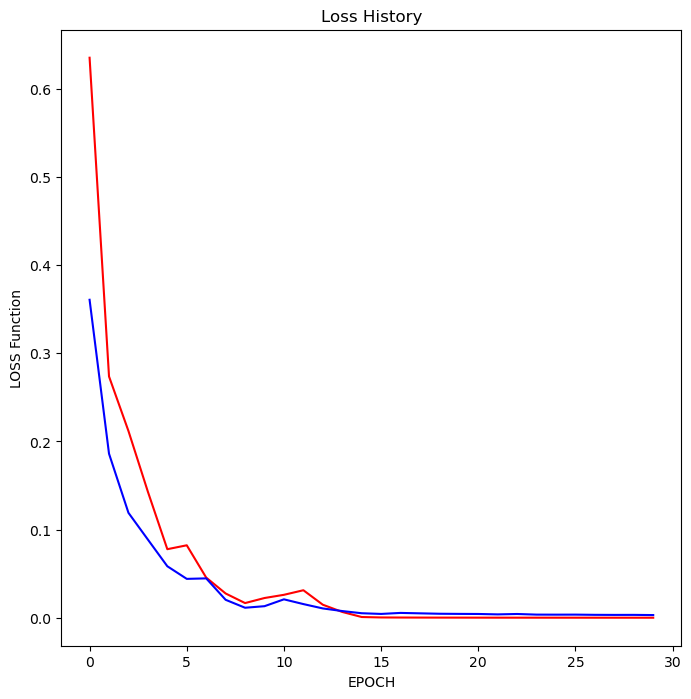

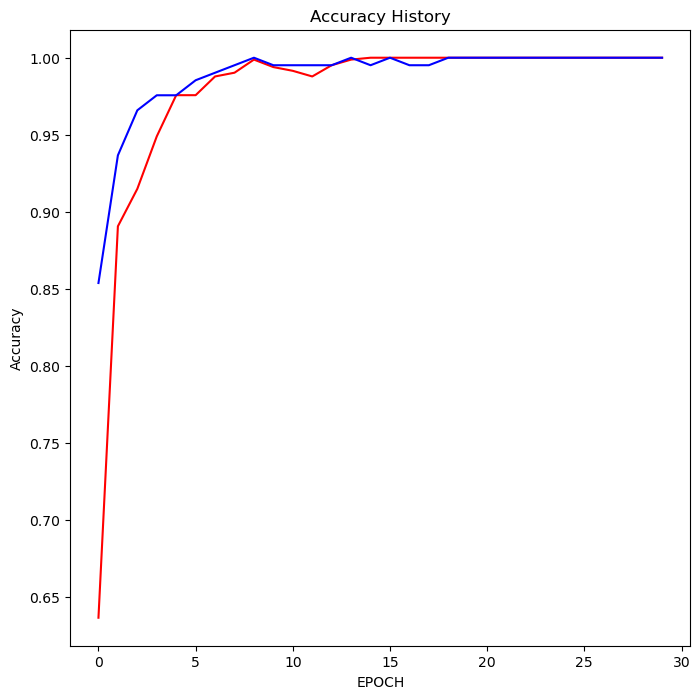

In [7]:
dr = DataReader()

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', metrics=['accuracy'],
              loss='binary_crossentropy')

print("\n\n** TRAINING START ** ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=30,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

draw_graph(history)